---

#  mplfinance Date iLoc Transform

---

In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%matplotlib inline
import pandas as pd

In [3]:
import mplfinance as mpf
mpf.__version__

'0.12.7a18'

In [4]:
import glob

In [5]:
df = pd.read_csv('../data/SP500_NOV2019_Hist.csv',index_col=0,parse_dates=True)
df = pd.read_csv('../data/yahoofinance-SPY-20200901-20210113.csv',index_col=0,parse_dates=True)

### Uses for DateIlocTransform

#### aka "DateIxPos" or "DateIPos" Transform

#### All uses are for `show_nontrading=False` only:

- `.to_date()` &nbsp; location *to* date: &nbsp; for tick label formatting.
- `.to_iloc()` &nbsp; date *to* location: &nbsp; for `xticks` placement.
- `.to_iloc()` &nbsp; date *to* location: &nbsp; for `xlim` placement.
- `.to_iloc()` &nbsp; date *to* location: &nbsp; for `lines` placement.

---

- It seems to me that  
  - **interpolation** may be better using the actual datetime series (rather than the linear formula), whereas 
  - **extrapolation** *will require* the linear formula.
    - Or for "known" cases may be able to use **date calculations**, for example:
      - quartile(0.65) == quartile(0.50) == quartile(0.35) == "known" frequency.
      - intraday with consistent trading hours in data
      - daily with weekends missing (maybe someday allow users to supply holidays)
      - weekly, monthly, yearly, etc. are simple?
  - need to run some tests to see which, if either, is better.
- Keep in mind, while testing, that `xlim` values will affect `xticks` placement.


In [6]:
df.shape
df.head()
df.tail()

(92, 6)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-09-01,350.209991,352.709991,349.239990,352.600006,349.703522,54999300
2020-09-02,354.670013,358.750000,353.429993,357.700012,354.761627,69540000
2020-09-03,355.869995,356.380005,342.589996,345.390015,342.552765,148011100
2020-09-04,346.130005,347.829987,334.869995,342.570007,339.755890,139156300
2020-09-08,336.709991,342.640015,332.880005,333.209991,330.472778,114465300


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-06,369.709991,376.980011,369.119995,373.549988,373.549988,107997700
2021-01-07,376.100006,379.899994,375.910004,379.100006,379.100006,68766800
2021-01-08,380.589996,381.489990,377.100006,381.260010,381.260010,71677200
2021-01-11,377.850006,380.579987,377.720001,378.690002,378.690002,51176700
2021-01-12,378.890015,379.859985,376.359985,378.769989,378.769989,52445000


In [7]:
s = df.head().index.to_series()
type(s.index)
type(s.index[0])
type(s.values)
type(s.values[0])
s.index[0] == s.values[0]
print(s.index[0])
print(s.values[0])

pandas.core.indexes.datetimes.DatetimeIndex

pandas._libs.tslibs.timestamps.Timestamp

numpy.ndarray

numpy.datetime64

True

2020-09-01 00:00:00
2020-09-01T00:00:00.000000000


### Use Cases
- For each use case (data entered) we interpolate a few points, and extrapolate a few points, both datetime -> iloc and iloc -> datetime

1. Intraday, part of a day (1 to 4 hours).  Data frequencies: min, 3min, 15min, 30min, hour, 90 min
2. Intraday, one full day.  (Data freq: min, 3min, 15min, 30min, hour, 90 min)
3. Intraday, 1.5 days. ...
4. Intraday, 10 days (skip weekends; weekend=FS and weekend=SS)
5. Intraday, 10 days (including weekends; weekend=FS and weekend=SS)
6. Daily, 3 days
7. Daily, 45 days (skip weekends, 1-day weekends, no weekends, holidays)
8. Daily, 125 days (skip weekends, 1-day weekends, no weekends, holidays)
9. Weekly ...
10. Monthly ...
11. Quarterly ...
12. Yearly ...


In [8]:
import ditransform as ditf

In [9]:
tf = ditf.DateIlocTransform(df.index)

dl = dir(tf)
for item in dl:
    if item[0:2] != '__':
        print(item)

basefreq= 1 days 00:00:00
basefreq.days= 1
weekmask= [True, True, True, True, True, False, False]

vc(value counts)=
1 days    71
3 days    16
4 days     3
2 days     1
Name: Date, dtype: int64
ifreq = None 

dfreq = B 

_extrapolation_limits
_inferred_frequency
_to_date_series
_to_iloc_series
infer_frequency
infer_open_close
infer_weekmask
time_series_index
timedelta_to_freqabbr
to_datetime
to_iloc


In [10]:
files = glob.glob('../data/*.csv')

In [11]:
files

['../data/alphavantage_demodata.csv',
 '../data/yahoofinance-GOOG-20040819-20180120.csv',
 '../data/SPY_20110701_20120630_Bollinger.csv',
 '../data/SP500_NOV2019_IDay.csv',
 '../data/yahoofinance-INTC-19950101-20040412.csv',
 '../data/SP500_NOV2019_Hist.csv',
 '../data/yahoofinance-SPY-20200901-20210113.csv',
 '../data/SP500_20191106_IDayBollinger.csv',
 '../data/yahoofinance-AAPL-20040819-20180120.csv',
 '../data/SP500_20191106_IDayBollTweak.csv',
 '../data/yahoofinance-SPY-20080101-20180101.csv',
 '../data/SP500_NOV2019_IDayRVol.csv',
 '../data/jpyusd_barchartdotcom.csv']

In [12]:
for fn in files:
    df = pd.read_csv(fn,index_col=0,parse_dates=True)
    tf = ditf.DateIlocTransform(df.index)
    
    print('===',fn,'===')
    #print(tf._inferred_frequency)
    #print()

basefreq= 0 days 00:05:00
basefreq.days= 0
weekmask= [True, True, True, True, True, False, False]
Date
2022-04-18 04:35:00   2022-04-18 04:35:00
2022-04-18 07:05:00   2022-04-18 07:05:00
2022-04-18 07:10:00   2022-04-18 07:10:00
2022-05-13 17:10:00   2022-05-13 17:10:00
2022-05-13 17:25:00   2022-05-13 17:25:00
2022-05-13 18:10:00   2022-05-13 18:10:00
Name: Date, dtype: datetime64[ns]

vc(value counts)=
0 days 00:05:00    1928
0 days 00:10:00     117
0 days 00:15:00      58
0 days 00:20:00      37
0 days 00:25:00      24
0 days 00:30:00      14
0 days 00:35:00      11
0 days 00:40:00       8
0 days 00:55:00       6
0 days 00:45:00       6
Name: Date, dtype: int64
ifreq = 5T 

dfreq = B 

=== ../data/alphavantage_demodata.csv ===
basefreq= 1 days 00:00:00
basefreq.days= 1
weekmask= [True, True, True, True, True, False, False]

vc(value counts)=
1 days    2649
3 days     608
4 days      90
2 days      29
5 days       2
Name: Date, dtype: int64
ifreq = None 

dfreq = B 

=== ../data/yaho

In [13]:
for fn in files:
    df = pd.read_csv(fn,index_col=0,parse_dates=True)
    #tf = ditf.DateIlocTransform(df.index)
    wm = ditf.DateIlocTransform.infer_weekmask(df.index)    
    print('===',fn,'===')
    print('weekmask=',wm, 'True=',wm.count(True))
    print()

=== ../data/alphavantage_demodata.csv ===
weekmask= [True, True, True, True, True, False, False] True= 5

=== ../data/yahoofinance-GOOG-20040819-20180120.csv ===
weekmask= [True, True, True, True, True, False, False] True= 5

=== ../data/SPY_20110701_20120630_Bollinger.csv ===
weekmask= [True, True, True, True, True, False, False] True= 5

=== ../data/SP500_NOV2019_IDay.csv ===
weekmask= [False, True, True, True, True, False, False] True= 4

=== ../data/yahoofinance-INTC-19950101-20040412.csv ===
weekmask= [True, True, True, True, True, False, False] True= 5

=== ../data/SP500_NOV2019_Hist.csv ===
weekmask= [True, True, True, True, True, False, False] True= 5

=== ../data/yahoofinance-SPY-20200901-20210113.csv ===
weekmask= [True, True, True, True, True, False, False] True= 5

=== ../data/SP500_20191106_IDayBollinger.csv ===
weekmask= [False, False, True, False, False, False, False] True= 1

=== ../data/yahoofinance-AAPL-20040819-20180120.csv ===
weekmask= [True, True, True, True, True

In [14]:
STOP HERE

SyntaxError: invalid syntax (<ipython-input-14-a6774c8535dd>, line 1)

In [15]:
import pprint
pp = pprint.PrettyPrinter(indent=4)

In [19]:
def inspect_transform(fn):
    df = pd.read_csv(fn,index_col=0,parse_dates=True)
    tf = ditf.DateIlocTransform(df.index)
    
    print('===',fn,'===')
    print('Inspect_transform: Inferred Frequency=')
    print(tf._inferred_frequency)
    print()
    
    print('call time_series_index with:')
    print('  start=',df.index[0],
          '\n  end=',df.index[-1],
          '\n  freq=',tf._inferred_frequency)
    new_dtix = tf.time_series_index(start=df.index[0],
                                    end=df.index[-1],
                                    freq=tf._inferred_frequency
                                   )
    print('new_dtix[0]=',new_dtix[0],
          '\nnew_dtix[-1]=',new_dtix[-1],)
    orig_dtix = df.index
    ldiff = len(orig_dtix) - len(new_dtix)
    if ldiff != 0:
        print('ldiff=',ldiff,
              'len(orig_dtix)=',len(orig_dtix),
              'len(new_dtix)=',len(new_dtix)
             )
        #minix = min(len(orig_dtix),len(new_dtix))
        #orig_dtix = orig_dtix[0:minix]
        #new_dtix  = new_dtix[0:minix]
    if ldiff > 2 or ldiff < -2 or not all(orig_dtix == new_dtix):
        #print('orig_dtix=',orig_dtix)
        #print(' new_dtix=',new_dtix)
        #print('In Orig but not in New :')
        orig_not_new = list(set(orig_dtix)-set(new_dtix))
        orig_not_new.sort()
        #pp.pprint(orig_not_new)
        #print('In New  but not in Orig:')
        new_not_orig = list(set(new_dtix)-set(orig_dtix))
        new_not_orig.sort()
        #pp.pprint(new_not_orig)
    return orig_dtix,new_dtix,orig_not_new,new_not_orig,tf._inferred_frequency

In [20]:
len(files)
files[1]

13

'../data/yahoofinance-GOOG-20040819-20180120.csv'

In [21]:
o,n,onn,nno,f = inspect_transform(files[0])

basefreq= 0 days 00:05:00
basefreq.days= 0
weekmask= [True, True, True, True, True, False, False]
Date
2022-04-18 04:35:00   2022-04-18 04:35:00
2022-04-18 07:05:00   2022-04-18 07:05:00
2022-04-18 07:10:00   2022-04-18 07:10:00
2022-05-13 17:10:00   2022-05-13 17:10:00
2022-05-13 17:25:00   2022-05-13 17:25:00
2022-05-13 18:10:00   2022-05-13 18:10:00
Name: Date, dtype: datetime64[ns]

vc(value counts)=
0 days 00:05:00    1928
0 days 00:10:00     117
0 days 00:15:00      58
0 days 00:20:00      37
0 days 00:25:00      24
0 days 00:30:00      14
0 days 00:35:00      11
0 days 00:40:00       8
0 days 00:55:00       6
0 days 00:45:00       6
Name: Date, dtype: int64
ifreq = 5T 

dfreq = B 

=== ../data/alphavantage_demodata.csv ===
Inspect_transform: Inferred Frequency=
TimeSeriesFrequency(d='B', i='5T', w='[True, True, True, True, True, False, False]', o='04:05:00', c='20:00:00')

call time_series_index with:
  start= 2022-04-18 04:35:00 
  end= 2022-05-13 18:10:00 
  freq= TimeSeriesFr

In [22]:
f
len(nno)
len(onn)
len(o)
len(n)
len(n) - len(o)

TimeSeriesFrequency(d='B', i='5T', w='[True, True, True, True, True, False, False]', o='04:05:00', c='20:00:00')

1554

0

2258

3812

1554

In [26]:
n.to_series()['2022-05-02':'2022-05-16']

2022-05-02 04:05:00   2022-05-02 04:05:00
2022-05-02 04:10:00   2022-05-02 04:10:00
2022-05-02 04:15:00   2022-05-02 04:15:00
2022-05-02 04:20:00   2022-05-02 04:20:00
2022-05-02 04:25:00   2022-05-02 04:25:00
                              ...        
2022-05-13 17:50:00   2022-05-13 17:50:00
2022-05-13 17:55:00   2022-05-13 17:55:00
2022-05-13 18:00:00   2022-05-13 18:00:00
2022-05-13 18:05:00   2022-05-13 18:05:00
2022-05-13 18:10:00   2022-05-13 18:10:00
Length: 1898, dtype: datetime64[ns]

In [27]:
n[0:2]
n[-3:-1]

DatetimeIndex(['2022-04-18 04:35:00', '2022-04-18 04:40:00'], dtype='datetime64[ns]', freq=None)

DatetimeIndex(['2022-05-13 18:00:00', '2022-05-13 18:05:00'], dtype='datetime64[ns]', freq=None)

In [28]:
odates = list(set([ts.date() for ts in o]))
odates.sort()
odates

[datetime.date(2022, 4, 18),
 datetime.date(2022, 4, 19),
 datetime.date(2022, 4, 20),
 datetime.date(2022, 4, 21),
 datetime.date(2022, 4, 22),
 datetime.date(2022, 4, 25),
 datetime.date(2022, 4, 26),
 datetime.date(2022, 4, 27),
 datetime.date(2022, 4, 28),
 datetime.date(2022, 4, 29),
 datetime.date(2022, 5, 2),
 datetime.date(2022, 5, 3),
 datetime.date(2022, 5, 4),
 datetime.date(2022, 5, 5),
 datetime.date(2022, 5, 6),
 datetime.date(2022, 5, 9),
 datetime.date(2022, 5, 10),
 datetime.date(2022, 5, 11),
 datetime.date(2022, 5, 12),
 datetime.date(2022, 5, 13)]

In [29]:
os = o.to_series()
os

Date
2022-04-18 04:35:00   2022-04-18 04:35:00
2022-04-18 07:05:00   2022-04-18 07:05:00
2022-04-18 07:10:00   2022-04-18 07:10:00
2022-04-18 08:05:00   2022-04-18 08:05:00
2022-04-18 08:40:00   2022-04-18 08:40:00
                              ...        
2022-05-13 17:00:00   2022-05-13 17:00:00
2022-05-13 17:05:00   2022-05-13 17:05:00
2022-05-13 17:10:00   2022-05-13 17:10:00
2022-05-13 17:25:00   2022-05-13 17:25:00
2022-05-13 18:10:00   2022-05-13 18:10:00
Name: Date, Length: 2258, dtype: datetime64[ns]

In [30]:
jj = 0
for d in odates[1:]:
    print(os[odates[jj]:d])
    break

Date
2022-04-18 04:35:00   2022-04-18 04:35:00
2022-04-18 07:05:00   2022-04-18 07:05:00
2022-04-18 07:10:00   2022-04-18 07:10:00
2022-04-18 08:05:00   2022-04-18 08:05:00
2022-04-18 08:40:00   2022-04-18 08:40:00
                              ...        
2022-04-18 19:15:00   2022-04-18 19:15:00
2022-04-18 19:20:00   2022-04-18 19:20:00
2022-04-18 19:50:00   2022-04-18 19:50:00
2022-04-18 19:55:00   2022-04-18 19:55:00
2022-04-18 20:00:00   2022-04-18 20:00:00
Name: Date, Length: 107, dtype: datetime64[ns]


In [31]:
os[odates[0]:odates[1]][0:16]

Date
2022-04-18 04:35:00   2022-04-18 04:35:00
2022-04-18 07:05:00   2022-04-18 07:05:00
2022-04-18 07:10:00   2022-04-18 07:10:00
2022-04-18 08:05:00   2022-04-18 08:05:00
2022-04-18 08:40:00   2022-04-18 08:40:00
2022-04-18 08:45:00   2022-04-18 08:45:00
2022-04-18 09:05:00   2022-04-18 09:05:00
2022-04-18 09:25:00   2022-04-18 09:25:00
2022-04-18 09:30:00   2022-04-18 09:30:00
2022-04-18 09:35:00   2022-04-18 09:35:00
2022-04-18 09:40:00   2022-04-18 09:40:00
2022-04-18 09:45:00   2022-04-18 09:45:00
2022-04-18 09:50:00   2022-04-18 09:50:00
2022-04-18 09:55:00   2022-04-18 09:55:00
2022-04-18 10:00:00   2022-04-18 10:00:00
2022-04-18 10:05:00   2022-04-18 10:05:00
Name: Date, dtype: datetime64[ns]

In [32]:
os[odates[0]:odates[1]][-26:-1]

Date
2022-04-18 15:35:00   2022-04-18 15:35:00
2022-04-18 15:40:00   2022-04-18 15:40:00
2022-04-18 15:45:00   2022-04-18 15:45:00
2022-04-18 15:50:00   2022-04-18 15:50:00
2022-04-18 15:55:00   2022-04-18 15:55:00
2022-04-18 16:00:00   2022-04-18 16:00:00
2022-04-18 16:05:00   2022-04-18 16:05:00
2022-04-18 16:10:00   2022-04-18 16:10:00
2022-04-18 16:15:00   2022-04-18 16:15:00
2022-04-18 16:25:00   2022-04-18 16:25:00
2022-04-18 16:40:00   2022-04-18 16:40:00
2022-04-18 17:35:00   2022-04-18 17:35:00
2022-04-18 17:40:00   2022-04-18 17:40:00
2022-04-18 17:45:00   2022-04-18 17:45:00
2022-04-18 17:50:00   2022-04-18 17:50:00
2022-04-18 17:55:00   2022-04-18 17:55:00
2022-04-18 18:00:00   2022-04-18 18:00:00
2022-04-18 18:05:00   2022-04-18 18:05:00
2022-04-18 18:25:00   2022-04-18 18:25:00
2022-04-18 18:30:00   2022-04-18 18:30:00
2022-04-18 18:55:00   2022-04-18 18:55:00
2022-04-18 19:15:00   2022-04-18 19:15:00
2022-04-18 19:20:00   2022-04-18 19:20:00
2022-04-18 19:50:00   2022-04

array(['NaT',   150,     5, ...,     5,    15,    45],
      dtype='timedelta64[ns]')

<AxesSubplot:xlabel='Date'>

Date
2022-05-13 14:50:00   0 days 00:00:00.000000005
2022-05-13 14:55:00   0 days 00:00:00.000000005
2022-05-13 15:00:00   0 days 00:00:00.000000005
2022-05-13 15:05:00   0 days 00:00:00.000000005
2022-05-13 15:10:00   0 days 00:00:00.000000005
2022-05-13 15:15:00   0 days 00:00:00.000000005
2022-05-13 15:20:00   0 days 00:00:00.000000005
2022-05-13 15:25:00   0 days 00:00:00.000000005
2022-05-13 15:30:00   0 days 00:00:00.000000005
2022-05-13 15:35:00   0 days 00:00:00.000000005
2022-05-13 15:40:00   0 days 00:00:00.000000005
2022-05-13 15:45:00   0 days 00:00:00.000000005
2022-05-13 15:50:00   0 days 00:00:00.000000005
2022-05-13 15:55:00   0 days 00:00:00.000000005
2022-05-13 16:00:00   0 days 00:00:00.000000005
2022-05-13 16:05:00   0 days 00:00:00.000000005
2022-05-13 16:10:00   0 days 00:00:00.000000005
2022-05-13 16:15:00   0 days 00:00:00.000000005
2022-05-13 16:20:00   0 days 00:00:00.000000005
2022-05-13 16:30:00   0 days 00:00:00.000000010
2022-05-13 16:40:00   0 days 00:00:

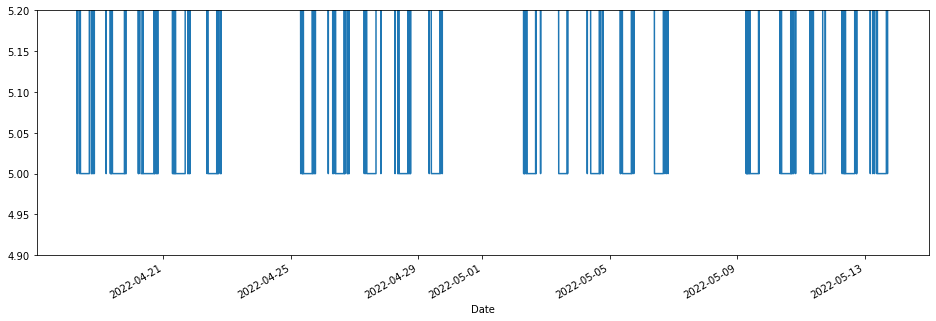

In [33]:
s = os[odates[0]:odates[1]]#[-26:-1]
s = os#[odates[0]:odates[1]]#[-26:-1]
minutes = s.diff(1).values / 60000000000
minutes
ms = pd.Series(minutes,index=s.index)
ms.plot(figsize=(16,5),ylim=(4.9,5.2))
ms[-26:-1]

In [34]:
s = os[odates[0]:odates[1]]
s.diff(1)[1]
pd.Timedelta('5m')

Timedelta('0 days 02:30:00')

Timedelta('0 days 00:05:00')

In [35]:
t = s[0]

t.hour
t.minute
t.time()

#dir(t)

4

35

datetime.time(4, 35)

In [36]:
diff = s.diff(1)

In [38]:
ftd = pd.Timedelta(f.ifreq)
ftd

Timedelta('0 days 00:05:00')

In [40]:
#for td in diff:
#    print(ftd == td)

In [41]:
import itertools

In [57]:
groups = itertools.groupby(diff.values)

In [53]:
gs = [g for g in groups]

In [73]:
len(gs)
jj = 0
maxrun = max([list(group) for _, group in itertools.groupby(diff.values)], key=len)
len(maxrun)

19

82

In [55]:
sg = set(diff.values)
len(sg)

10

In [ ]:
# dates = list(set([ts.date() for ts in o]))
# dates.sort()
# #dates

In [ ]:
#o.to_series()['2022-05-04':'2022-05-05']

In [ ]:
#n.to_series()['2022-05-04':'2022-05-05']